# **Mounting Google Drive**

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# **Import Necessary Libraries**

In [2]:
# Imports
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


**Read in data collected through BCI headset**

In [3]:
# Reading in CSV datasets
calm_state1 = pd.read_csv('/content/drive/MyDrive/output.csv')
calm_state2 = pd.read_csv('/content/drive/MyDrive/output2.csv')
calm_state3 = pd.read_csv('/content/drive/MyDrive/output (3).csv')
calm_state4 = pd.read_csv('/content/drive/MyDrive/output (4).csv')

#akshaj = pd.read_csv('/content/drive/MyDrive/akshaj_real30.csv')
# adf = pd.read_csv('/content/drive/MyDrive/BCI_AET/Init_Data/akshaj.csv')
# rdf = pd.read_csv('/content/drive/MyDrive/BCI_AET/Init_Data/rahul.csv')
# ndf = pd.read_csv('/content/drive/MyDrive/BCI_AET/Init_Data/neal.csv').drop([181])
#ldf = pd.read_csv('/content/drive/MyDrive/BCI_AET/Init_Data/lillia.csv')
# rdf = pd.read_csv('/content/drive/MyDrive/BCI_AET/Init_Data/radhiyaa.csv')
print(len(calm_state3))
print(len(calm_state4))

603
645


653


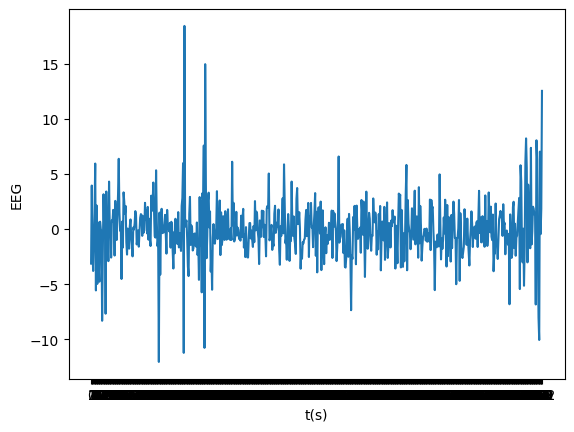

In [4]:
#Plot data given the dataset and label
def plotData(dataset, label):
  sample = len(dataset)
  print(sample)
  x = np.arange(sample)
  y = dataset[label]

  plt.plot(x, y)
  plt.xlabel('t(s)')
  plt.ylabel(label)
  plt.xticks(x)
  plt.show()

plotData(calm_state1, "EEG")

# **Double Dataset Subplot FFT Graphs**

In [5]:
#Slices bins
def binSlicing1(start,end, dataset, label, width):
  # Number of sample points
  N = len(dataset[label])
  # sample spacing
  T = 1.0 / 1024.0
  x = np.arange(N)
  y = (dataset)[label][start:end]
  yf = fft(np.array(y))
  xf = fftfreq(end-start, T)[:N//2]


  yPlot =  2.0/N * np.abs(yf[0:N//2])

  return xf[0:width//2], yPlot[0:width//2], label, width

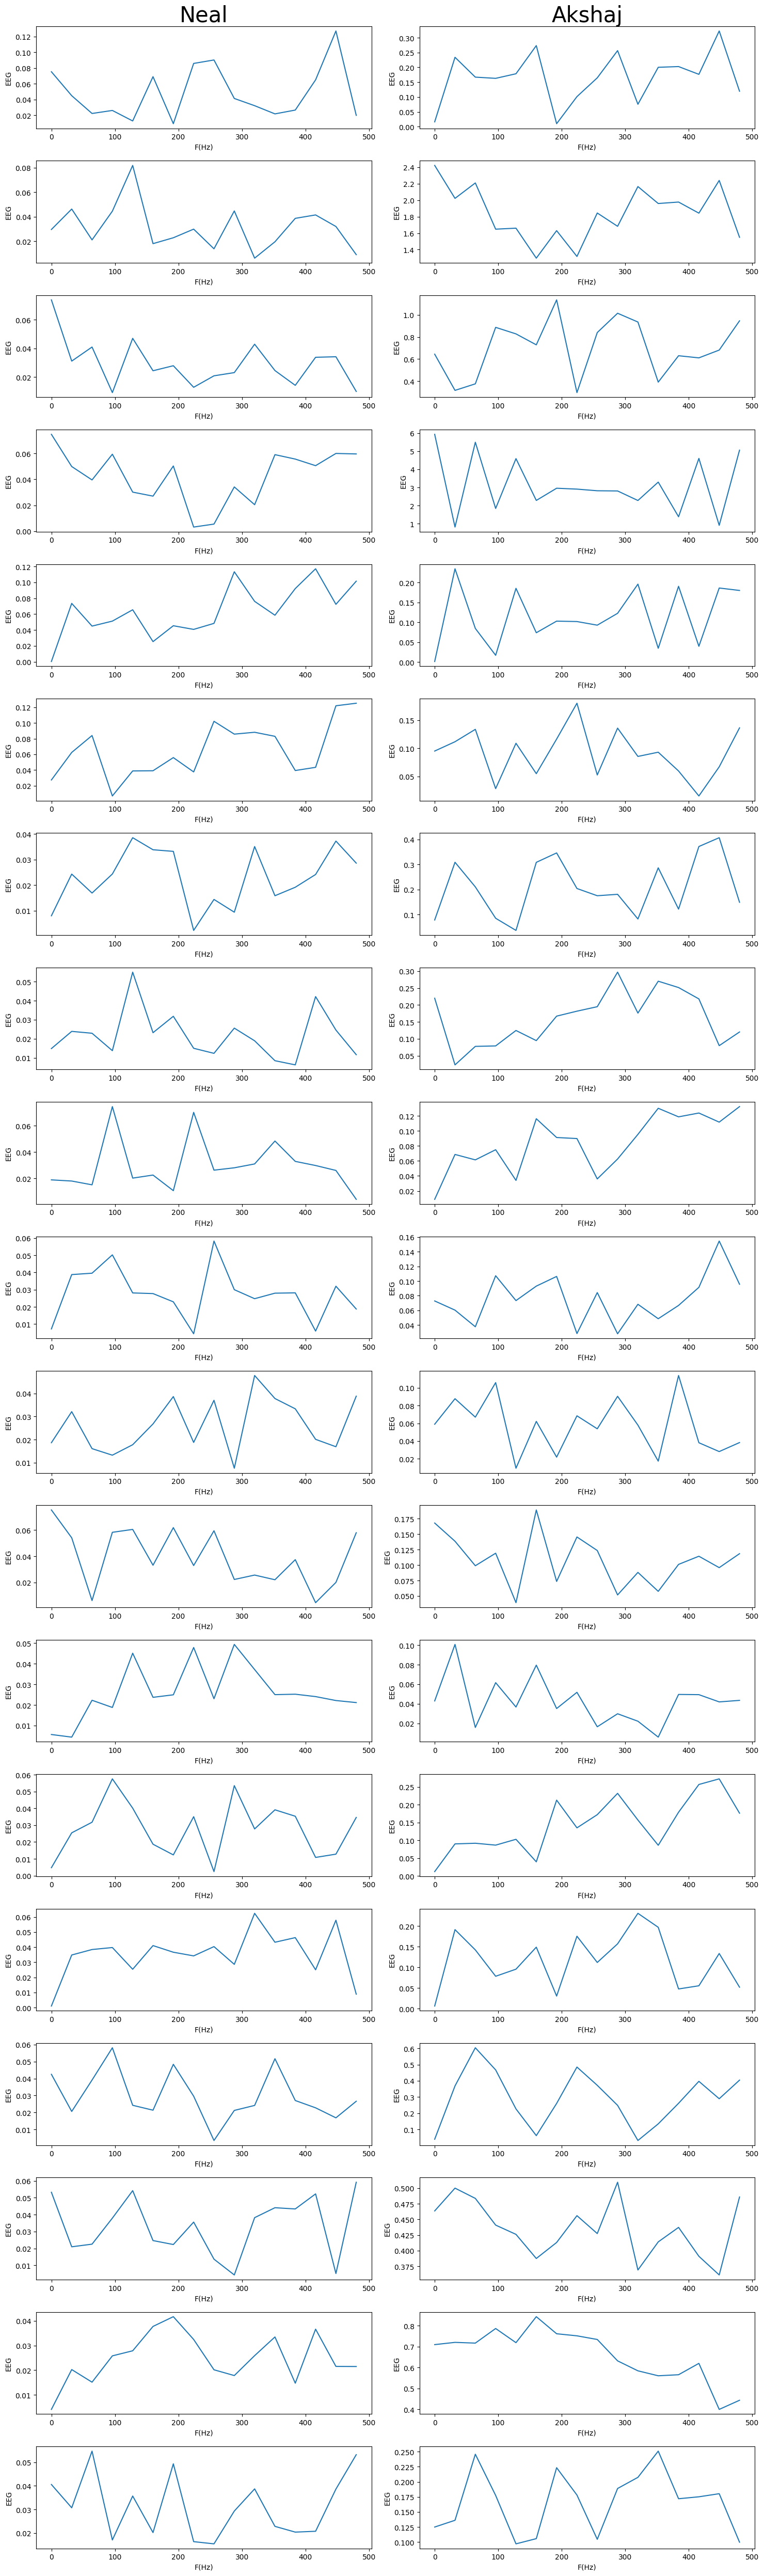

In [6]:
#Plots sliced bins
def plotBins1(dataset1, dataset2, binWidth):
  fig, ax = plt.subplots(nrows=19, ncols=2, figsize=(15,50))
  binNumber=0
  amount = len(dataset2)//32
  for i in range(amount):
    xf1, yPlot1, label, width = binSlicing1(binNumber, binNumber + binWidth, dataset1, "EEG", binWidth)
    xf2, yPlot2, label, width  = binSlicing1(binNumber, binNumber + binWidth, dataset2, "EEG", binWidth)
    ax[i, 0].plot(xf1, yPlot1)
    ax[i, 1].plot(xf2, yPlot2)
    ax[i, 0].set_xlabel('F(Hz)')
    ax[i, 0].set_ylabel('EEG')
    ax[i, 1].set_xlabel('F(Hz)')
    ax[i, 1].set_ylabel('EEG')
    ax[0,0].set_title("Neal",fontsize=30)
    ax[0,1].set_title("Akshaj",fontsize=30)

    binNumber+=32
  plt.tight_layout()
  plt.show()
plotBins1(calm_state1, calm_state2, 32)

# **Single dataset FFT Graphs**

In [7]:
#Slices bins
def binSlicing2(start,end, dataset, label, width):
  # Number of sample points
  N = len(dataset)
  # sample spacing
  T = 1.0 / 1024.0
  x = np.arange(N)
  y = (dataset)[label][start:end]
  yf = fft(np.array(y))
  xf = fftfreq(end-start, T)[:N//2]
  yPlot =  2.0/N * np.abs(yf[0:N//2])

  plt.plot(xf[0:width//2], yPlot[0:width//2])
  plt.xlabel('F(Hz)')
  plt.ylabel(label)
  print("Sample start: ", start)
  print("Sample end: ", end)
  print("xf values: ", xf[0:width//2])
  print("yPlot values: ", yPlot[0:width//2])
  plt.grid()
  plt.show()
  return xf[0:width//2], yPlot[0:width//2]

Sample start:  0
Sample end:  32
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.0163876  0.23392972 0.16708571 0.1629986  0.17843731 0.2733696
 0.01016678 0.10139265 0.16468951 0.25644679 0.07566156 0.20025917
 0.20270418 0.1765139  0.32266774 0.11955474]


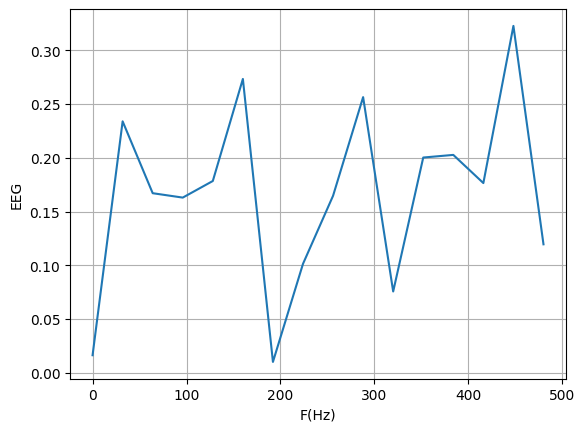

Sample start:  32
Sample end:  64
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [2.42140199 2.02166541 2.2087506  1.64810964 1.66033501 1.29664455
 1.63031875 1.31716331 1.84430211 1.68294824 2.16504727 1.95939812
 1.97713699 1.84241495 2.23933491 1.54933663]


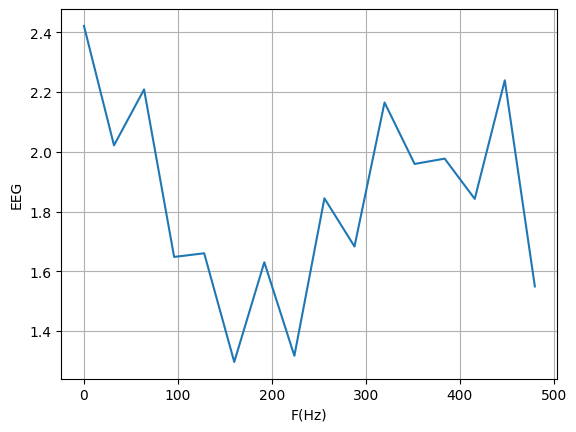

Sample start:  64
Sample end:  96
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.6436085  0.31543225 0.37480889 0.88672052 0.82753445 0.72835983
 1.13574862 0.29537167 0.83959727 1.01459858 0.93506127 0.39038339
 0.62952044 0.61019282 0.6808679  0.94593749]


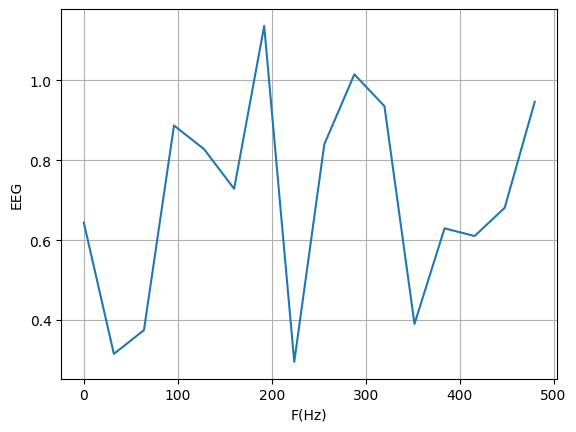

Sample start:  96
Sample end:  128
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [5.92844422 0.81894819 5.49304785 1.84413414 4.58920351 2.28562795
 2.95823829 2.90960243 2.81909236 2.80823456 2.28243038 3.29572096
 1.38626139 4.60211479 0.91309432 5.05706761]


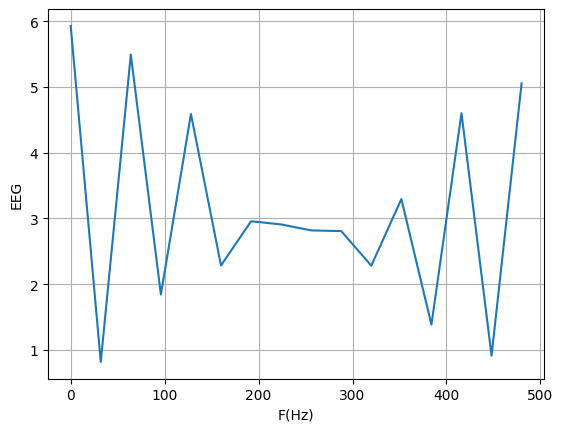

Sample start:  128
Sample end:  160
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.00140967 0.23498489 0.08472039 0.01707358 0.18574324 0.07386414
 0.10313132 0.10207243 0.09294677 0.12280011 0.19630627 0.03473339
 0.19090374 0.03973697 0.18654452 0.18040501]


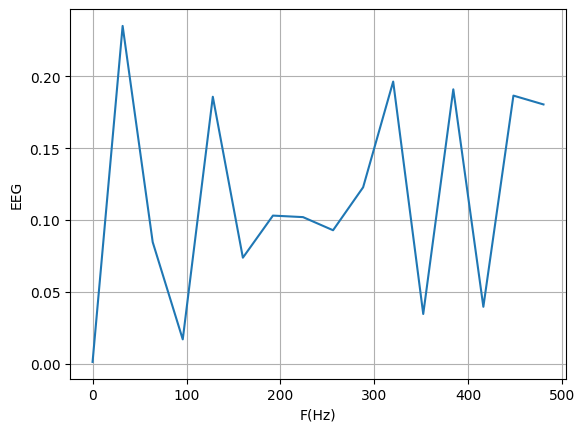

Sample start:  160
Sample end:  192
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.09506924 0.11159886 0.1336047  0.02832121 0.10888277 0.05488068
 0.11632127 0.17997204 0.05259536 0.13576674 0.08550907 0.09299813
 0.05964154 0.01529032 0.0670335  0.136268  ]


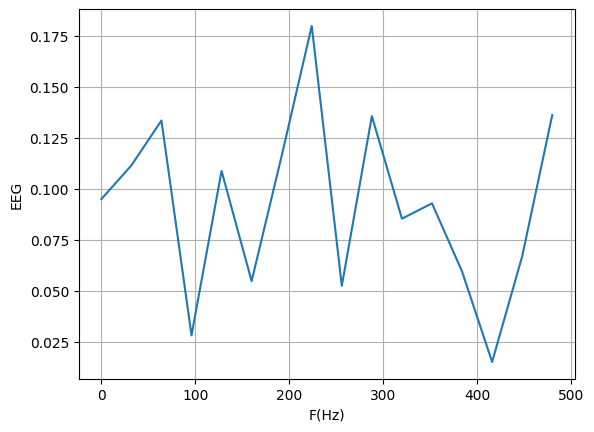

Sample start:  192
Sample end:  224
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.07847747 0.30849628 0.2103631  0.0853363  0.03686413 0.30822787
 0.34577121 0.20394021 0.17513465 0.18076315 0.08247392 0.28635922
 0.1218108  0.37129943 0.40650645 0.14898352]


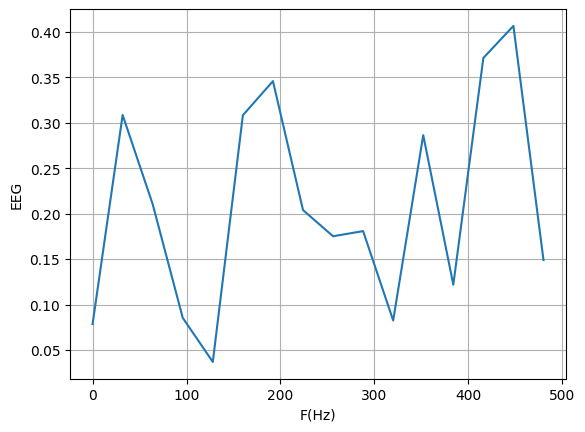

Sample start:  224
Sample end:  256
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.22002178 0.02279637 0.07752572 0.07890015 0.12457491 0.09461262
 0.16703909 0.18173774 0.19496221 0.29725547 0.17605263 0.27045947
 0.25166389 0.21802239 0.07967449 0.12015495]


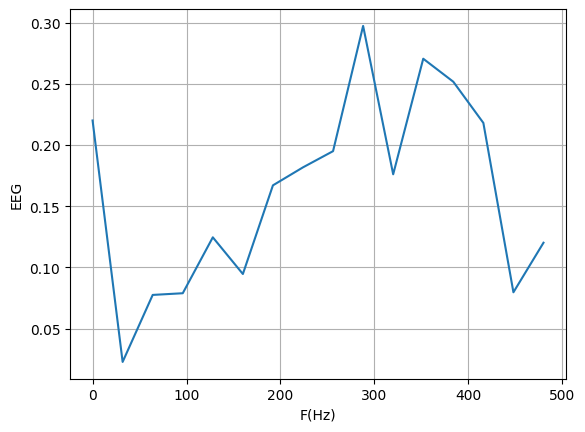

Sample start:  256
Sample end:  288
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.00881385 0.06870469 0.06145819 0.07500989 0.03406887 0.11638099
 0.09131516 0.08991036 0.03603492 0.06260763 0.0954913  0.13032238
 0.11888334 0.12398667 0.11183977 0.13256288]


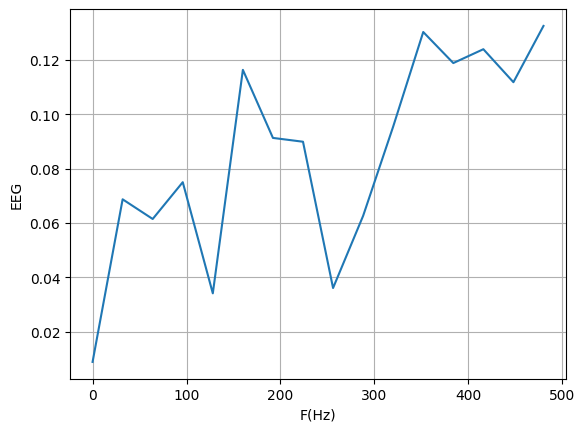

Sample start:  288
Sample end:  320
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.07289708 0.06039654 0.03776788 0.10721092 0.07338437 0.09308707
 0.10626893 0.02852269 0.08429037 0.02822416 0.06835969 0.04872036
 0.06679867 0.09143972 0.1544381  0.09562168]


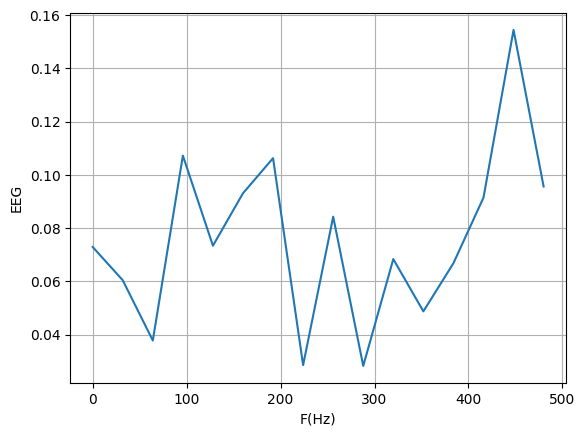

Sample start:  320
Sample end:  352
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.05898347 0.08769724 0.06694475 0.10584103 0.00944609 0.06217013
 0.02195497 0.06844999 0.05383682 0.09040615 0.05798869 0.01742313
 0.11383081 0.03814914 0.02819864 0.03833648]


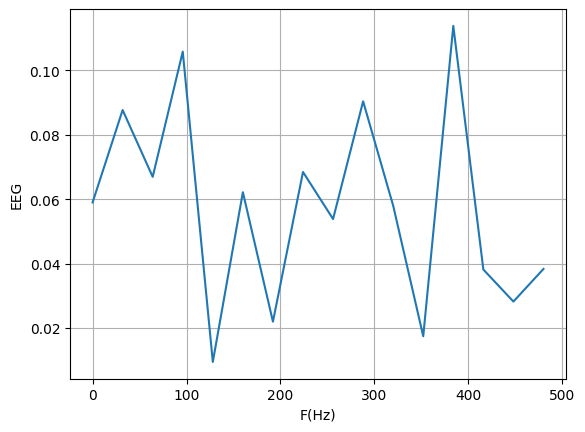

Sample start:  352
Sample end:  384
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.16783258 0.13842034 0.09885923 0.11909087 0.03917628 0.18897875
 0.0735006  0.14535711 0.12346264 0.05168873 0.08810859 0.05748044
 0.10101382 0.11421033 0.09578972 0.11834674]


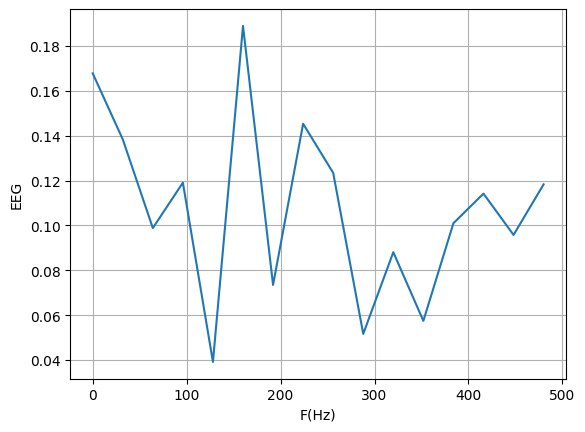

Sample start:  384
Sample end:  416
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.04297717 0.10071455 0.01587798 0.06163755 0.03675656 0.07952577
 0.03521414 0.05178417 0.01658028 0.0298749  0.02226308 0.00600393
 0.0496196  0.04939365 0.04199494 0.0435519 ]


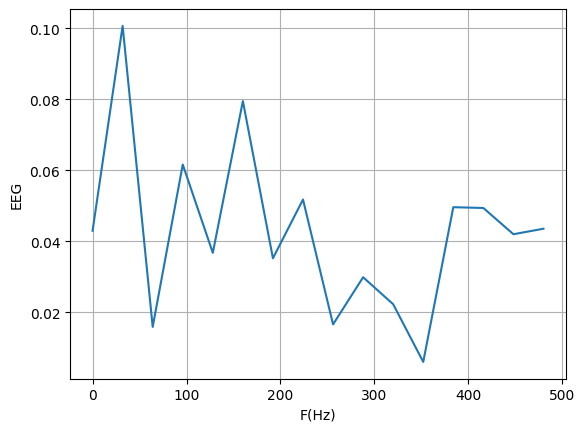

Sample start:  416
Sample end:  448
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.01257113 0.09031551 0.09214053 0.08684304 0.10318016 0.03998217
 0.21318985 0.13534738 0.1723794  0.23221747 0.15729836 0.08645364
 0.17918931 0.2570982  0.27289026 0.17649878]


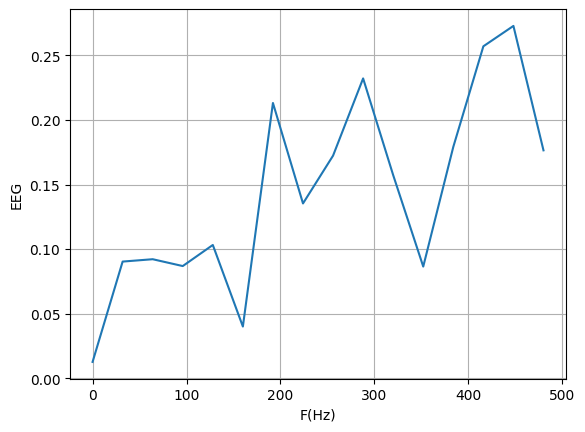

Sample start:  448
Sample end:  480
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.00631648 0.19136785 0.14227807 0.07841426 0.09558879 0.14890522
 0.03049722 0.17539779 0.1118524  0.15694309 0.23087365 0.19701594
 0.0476883  0.055396   0.13357071 0.05192213]


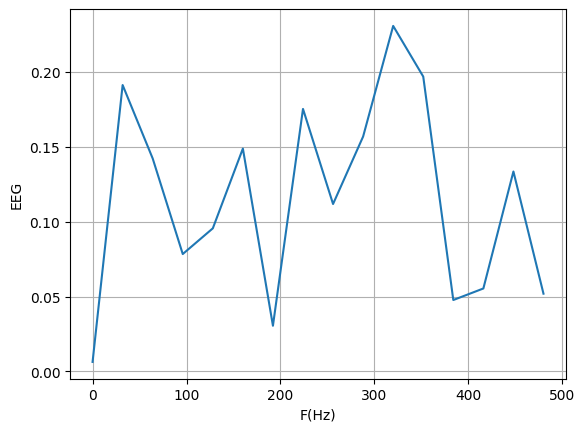

Sample start:  480
Sample end:  512
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.0401232  0.36849209 0.60357129 0.46715784 0.22687085 0.06225069
 0.2606155  0.48478315 0.37227179 0.24882197 0.03231791 0.13475805
 0.26151327 0.39681685 0.2896051  0.40415376]


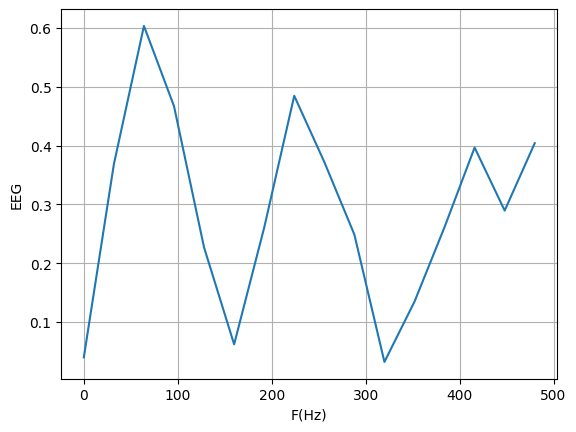

Sample start:  512
Sample end:  544
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.4636653  0.50013576 0.48371805 0.44096606 0.42615067 0.38752795
 0.41313878 0.45607484 0.42743698 0.5095924  0.36913995 0.41409066
 0.43731295 0.39105819 0.36118271 0.48596567]


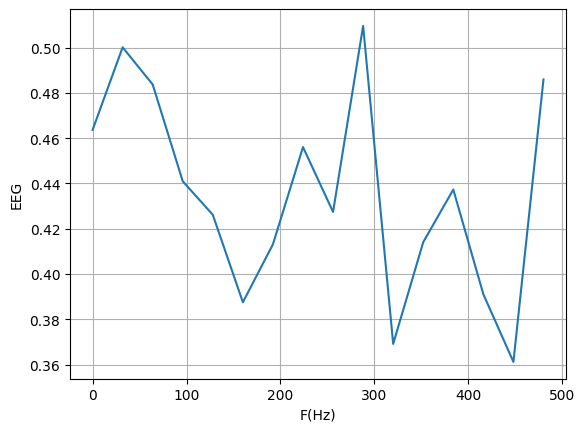

Sample start:  544
Sample end:  576
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.7090704  0.71981071 0.71629884 0.78604089 0.71840853 0.84261006
 0.76098929 0.75110221 0.73364357 0.63144929 0.58385243 0.56013946
 0.56516286 0.61943216 0.39945391 0.44312414]


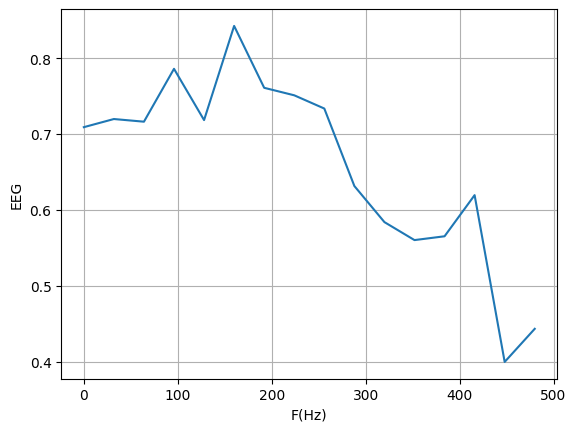

Sample start:  576
Sample end:  608
xf values:  [  0.  32.  64.  96. 128. 160. 192. 224. 256. 288. 320. 352. 384. 416.
 448. 480.]
yPlot values:  [0.1249666  0.1361636  0.2456465  0.17740117 0.09710835 0.10574598
 0.22331607 0.17798967 0.10463559 0.18886731 0.20732371 0.25078414
 0.1718831  0.17509951 0.18023574 0.09983532]


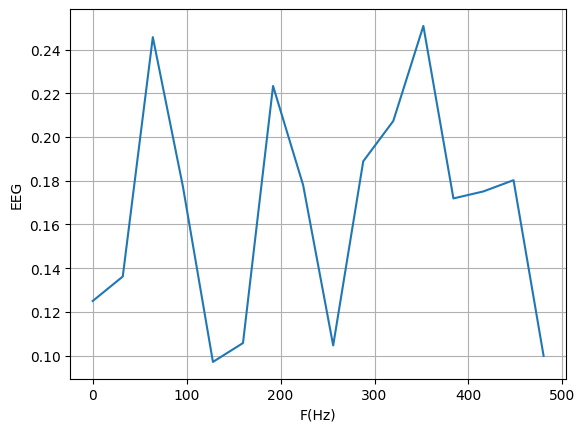

In [8]:
def plotBins2(amount, binWidth,dataset):
  binNumber=0
  for i in range(amount):
    binSlicing2(binNumber, binNumber + binWidth, dataset, "EEG", binWidth)
    binNumber+=binWidth
def actualPlot(dataset):

  amountGraphs = len(dataset)// 32
  plotBins2(amountGraphs, 32, dataset)
actualPlot(calm_state2)

In [9]:
#0 = Neal
#1 = Akshaj
start = 0
end = 32
inputFeatures = pd.DataFrame()

for i in range(20):
    N = len(calm_state1)
    T = 1.0 / 1024.0

    y = calm_state1["EEG"][start:end]

    yf = fft(np.array(y))
    xf = fftfreq(end - start, T)[:N // 2]
    yPlot = 2.0 / N * np.abs(yf[0:N // 2])

    df = pd.DataFrame({'Binary': 0, 'yPlot': yPlot})
    inputFeatures = pd.concat([inputFeatures, df], ignore_index=True)

    start += 32
    end += 32

start = 0
end = 32
for i in range(19):
    N = len(calm_state2)
    T = 1.0 / 1024.0

    y = calm_state2["EEG"][start:end]
    yf = fft(np.array(y))
    xf = fftfreq(end - start, T)[:N // 2]
    yPlot = 2.0 / N * np.abs(yf[:N // 2])

    df2 = pd.DataFrame({'Binary': 0, 'yPlot': yPlot})
    inputFeatures = pd.concat([inputFeatures, df2], ignore_index=True)

    start += 32
    end += 32

inputFeatures.loc[39:77, 'Binary'] = 1
inputFeatures.loc[78:1248, 'Binary'] = None

inputFeatures = inputFeatures[['Binary', 'yPlot']]

inputFeatures.to_csv('output.csv', index=False)

In [10]:

from sklearn.model_selection import train_test_split
import sys

input = pd.read_csv("output.csv")
output = input["Binary"][0:78]


input_dropped = input.drop(["Binary"], axis = 1)
matrix_1d_X = input_dropped.to_numpy().ravel()
y = output.to_numpy().ravel()

row = len(matrix_1d_X)//16
col = 16

matrix_2d_X = np.zeros(shape=(row, col))

it = 0
for i in range(row):
  for j in range(col):
    matrix_2d_X[i][j] = matrix_1d_X[it]
    it+=1

np.set_printoptions(threshold=sys.maxsize)
print(np.shape(matrix_2d_X))


print(matrix_1d_X)
print(matrix_2d_X)
X_train, X_test, y_train, y_test = train_test_split(matrix_2d_X, y, test_size=0.2, random_state=42)

(78, 16)
[7.53392609e-02 4.49436779e-02 2.23484875e-02 2.61854415e-02
 1.28512963e-02 6.90937482e-02 9.36871658e-03 8.59030961e-02
 9.02861223e-02 4.14167945e-02 3.22408715e-02 2.18350772e-02
 2.66699276e-02 6.50431258e-02 1.27132089e-01 1.99629657e-02
 9.31918843e-02 1.99629657e-02 1.27132089e-01 6.50431258e-02
 2.66699276e-02 2.18350772e-02 3.22408715e-02 4.14167945e-02
 9.02861223e-02 8.59030961e-02 9.36871658e-03 6.90937482e-02
 1.28512963e-02 2.61854415e-02 2.23484875e-02 4.49436779e-02
 2.95606076e-02 4.62528062e-02 2.10846868e-02 4.45176252e-02
 8.18481620e-02 1.80136748e-02 2.28134190e-02 2.98473479e-02
 1.38045657e-02 4.47003051e-02 6.17501404e-03 1.95296816e-02
 3.86544125e-02 4.14433504e-02 3.20124041e-02 9.03725510e-03
 3.15289495e-02 9.03725510e-03 3.20124041e-02 4.14433504e-02
 3.86544125e-02 1.95296816e-02 6.17501404e-03 4.47003051e-02
 1.38045657e-02 2.98473479e-02 2.28134190e-02 1.80136748e-02
 8.18481620e-02 4.45176252e-02 2.10846868e-02 4.62528062e-02
 7.37745532e-02

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

print(np.shape(X_test))
print(np.shape(y_test))
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.fit(X_train, y_train, epochs=78, validation_split=0.2)
model.save('/content/drive/MyDrive/')
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

(16, 16)
(16,)
Epoch 1/78
2/2 [==============================] - 1s 368ms/step - loss: 0.7162 - accuracy: 0.5306 - val_loss: 0.6941 - val_accuracy: 0.3077
Epoch 2/78
2/2 [==============================] - 0s 74ms/step - loss: 0.7042 - accuracy: 0.4694 - val_loss: 0.6926 - val_accuracy: 0.3077
Epoch 3/78
2/2 [==============================] - 0s 60ms/step - loss: 0.6880 - accuracy: 0.5102 - val_loss: 0.6910 - val_accuracy: 0.3077
Epoch 4/78
2/2 [==============================] - 0s 81ms/step - loss: 0.6788 - accuracy: 0.5306 - val_loss: 0.6895 - val_accuracy: 0.3846
Epoch 5/78
2/2 [==============================] - 0s 64ms/step - loss: 0.6668 - accuracy: 0.5306 - val_loss: 0.6881 - val_accuracy: 0.3846
Epoch 6/78
2/2 [==============================] - 0s 64ms/step - loss: 0.6571 - accuracy: 0.5102 - val_loss: 0.6866 - val_accuracy: 0.3846
Epoch 7/78
2/2 [==============================] - 0s 54ms/step - loss: 0.6463 - accuracy: 0.5102 - val_loss: 0.6851 - val_accuracy: 0.3846
Epoch 8/78


In [12]:
!pip install --upgrade plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [13]:
import plotly.graph_objects as go

# Define the layers of the neural network
layers = [
    {"name": "Input Layer", "units": 16},
    {"name": "Hidden Layer", "units": 32},
    {"name": "Output Layer", "units": 1}
]

# Create 3D plot
fig = go.Figure()

# Add nodes for each layer
for i, layer in enumerate(layers):
    units = layer["units"]
    layer_name = layer["name"]

    x = [i] * units
    y = list(range(1, units + 1))
    z = [0] * units

    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers',
                               marker=dict(size=10, color='blue'),
                               text=[f'{layer_name}<br>Unit {j}' for j in range(1, units + 1)],
                               name=layer_name))

# Connect nodes with lines
for i in range(len(layers) - 1):
    current_units = layers[i]["units"]
    next_units = layers[i + 1]["units"]

    for j in range(1, current_units + 1):
        for k in range(1, next_units + 1):
            fig.add_trace(go.Scatter3d(x=[i, i + 1], y=[j, k], z=[0, 0], mode='lines',
                                       line=dict(width=2, color='black'),
                                       hoverinfo='none'))

# Set layout
fig.update_layout(scene=dict(aspectmode="manual", aspectratio=dict(x=1, y=1, z=0.5)),
                  scene_xaxis_title="Layers",
                  scene_yaxis_title="Units",
                  scene_zaxis_title="",
                  scene_yaxis=dict(showticklabels=False),
                  showlegend=False)

# Show the 3D plot
fig.show()
